In [50]:
import pandas as pd
import numpy as np

from plotnine import *

In [16]:
star_wars = pd.read_csv("star_wars.csv")
star_wars.drop(15, inplace=True)
star_wars

,Unnamed: 0,name,height,mass,hair_color,skin_color,eye_color,birth_year,sex,gender,homeworld,species
0,1,Luke Skywalker,172.0,77.0,blond,fair,blue,19.0,male,masculine,Tatooine,Human
1,2,C-3PO,167.0,75.0,NaN,gold,yellow,112.0,none,masculine,Tatooine,Droid
2,3,R2-D2,96.0,32.0,NaN,"white, blue",red,33.0,none,masculine,Naboo,Droid
3,4,Darth Vader,202.0,136.0,none,white,yellow,41.9,male,masculine,Tatooine,Human
4,5,Leia Organa,150.0,49.0,brown,light,brown,19.0,female,feminine,Alderaan,Human
...,...,...,...,...,...,...,...,...,...,...,...,...
78,79,Finn,NaN,NaN,black,dark,dark,NaN,male,masculine,NaN,Human
79,80,Rey,NaN,NaN,brown,light,hazel,NaN,female,feminine,NaN,Human
80,81,Poe Dameron,NaN,NaN,brown,light,brown,NaN,male,masculine,NaN,Human
81,82,BB8,NaN,NaN,none,none,black,NaN,none,masculine,NaN,Droid


### The [docs](https://plotnine.readthedocs.io/en/stable/api.html) again and always.

## Changing labels

Labels are the first place readers look. We are conditioned to get our bearing from labels. Make sure your plots have good ones.

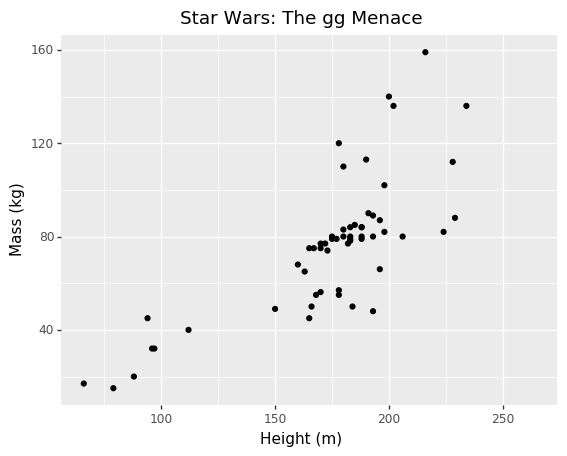

{<ggplot: (314662653)>}

In [3]:
{
    ggplot(star_wars, aes('height', 'mass')) +
    geom_point(size = 3, alpha = .5) +
    labs(
        title = "Star Wars: The gg Menace",
        x = "Height (m)",
        y = "Mass (kg)",

    )
}

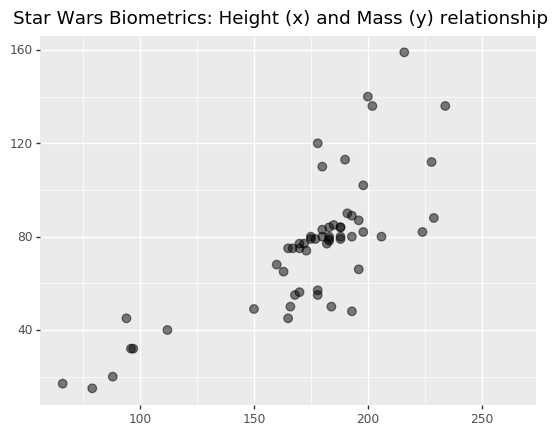

{<ggplot: (318373929)>}

In [17]:
# remove labels completely
{
    ggplot(star_wars, aes('height', 'mass')) +
    geom_point(size = 3, alpha = .5) +
    labs(
        title = 'Star Wars Biometrics: Height (x) and Mass (y) relationship',
        x = '',
        y = ''

    )
}
# notice the margin drop
# more useful for colors/fills

## Changing scales (aka everything but labels)

Consider the mapping relationship aesthetics have to columns in `data`. Each one of those `aes()` definitions gets a scale of its own.

Note ~ The default behavior attempts to guess the type of scale from the type of data. (Pretty smart huh?) This causes a lot of errors, e.g. column looks like floats but is actually strings and ggplot complains.

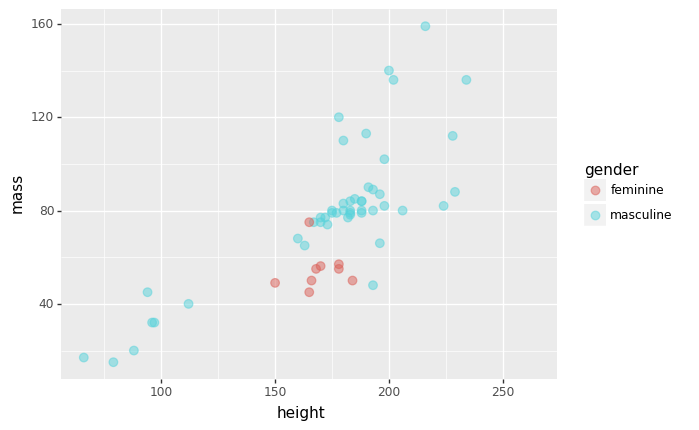

{<ggplot: (316901861)>}

In [6]:
{
    ggplot(star_wars, aes('height', 'mass', color = 'gender')) +
    geom_point(size = 3, alpha = .5)
}

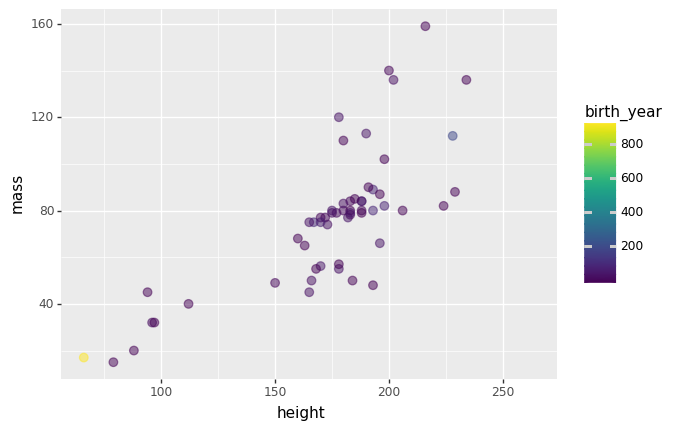

{<ggplot: (316951081)>}

In [7]:
{
    ggplot(star_wars, aes('height', 'mass', color = 'birth_year')) +
    geom_point(size = 3, alpha = .5)
}

In [8]:
# always watching for those pesky outliers
star_wars[star_wars.birth_year > 800]

,Unnamed: 0,name,height,mass,hair_color,skin_color,eye_color,birth_year,sex,gender,homeworld,species
18,19,Yoda,66.0,17.0,white,green,brown,896.0,male,masculine,NaN,Yoda's species


In [9]:
star_wars.drop(18, inplace=True)

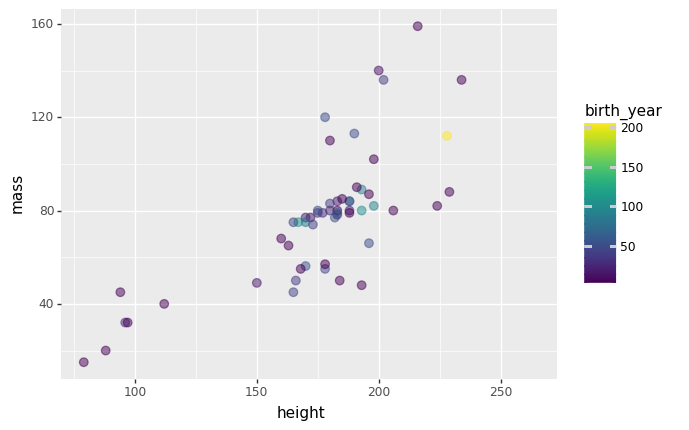

{<ggplot: (317035149)>}

In [10]:
{
    ggplot(star_wars, aes('height', 'mass', color = 'birth_year')) +
    geom_point(size = 3, alpha = .5)
}

#### Good colors from Dr. Cynthia Brewer

[https://colorbrewer2.org/]()

Colors make the world go round. And good colors are a key part of good graphics.

There is a lot of research that goes into how humans perceive plots. It's a good idea to stick with these well studies

Note ~ Be sure your color scale matches the underlying data scale, e.g. continuous goes with continues, discrete with discrete

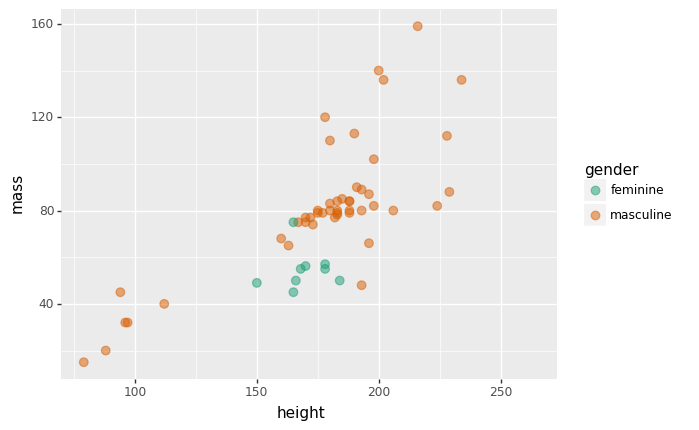

{<ggplot: (317037585)>}

In [11]:
{
    ggplot(star_wars, aes('height', 'mass', color = 'gender')) +
    geom_point(size = 3, alpha = .5) +
    scale_color_brewer(type = 'qual', palette = 'Dark2')
}

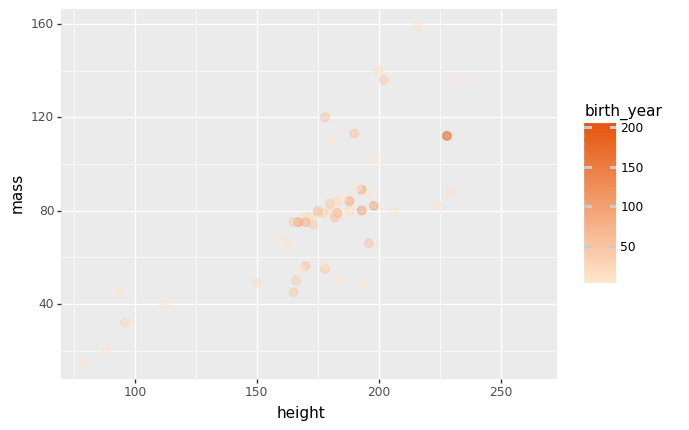

{<ggplot: (317049061)>}

In [12]:
{
    ggplot(star_wars, aes('height', 'mass', color = 'birth_year')) +
    geom_point(size = 3, alpha = .5) +
    scale_color_gradient(low='#fee6ce', high='#e6550d')
}

#### Manual colors for the brave

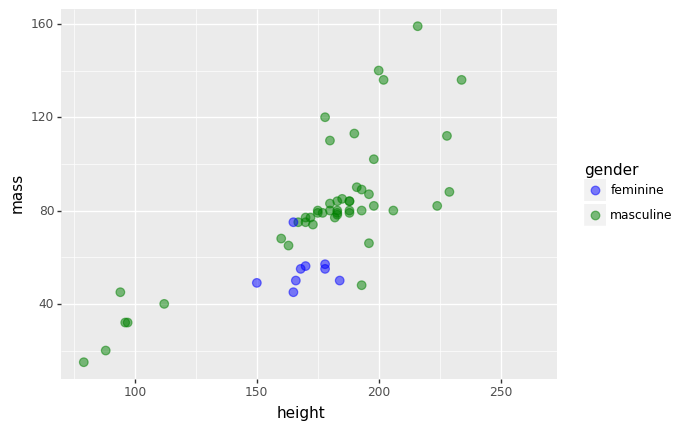

{<ggplot: (318238741)>}

In [14]:
{
    ggplot(star_wars, aes('height', 'mass', color = 'gender')) +
    geom_point(size = 3, alpha = .5) +
    scale_color_manual(values=['blue', 'green'])
}

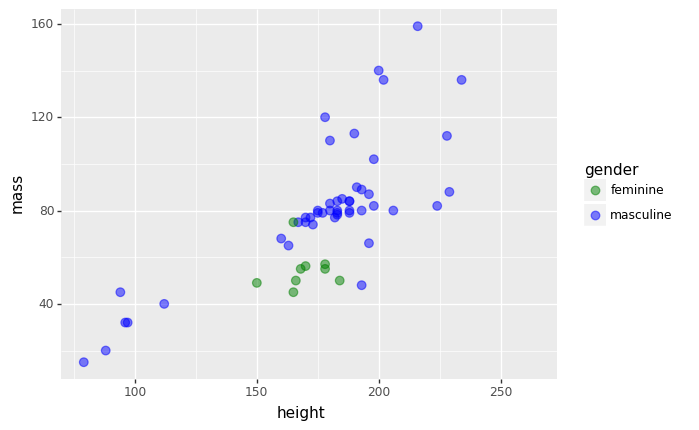

{<ggplot: (316942245)>}

In [15]:
# use names to be safe
{
    ggplot(star_wars, aes('height', 'mass', color = 'gender')) +
    geom_point(size = 3, alpha = .5) +
    scale_color_manual(values={'masculine': 'blue', 'feminine': 'green'})
}

### The rest of the scales

* Axis (x & y)
* Size
* Alpha (transparency)
* Shape

Note ~ There is always a scale. Even if you haven't defined it, `ggplot` has created one for you. But we are demanding artists and we want fine-tuned control.

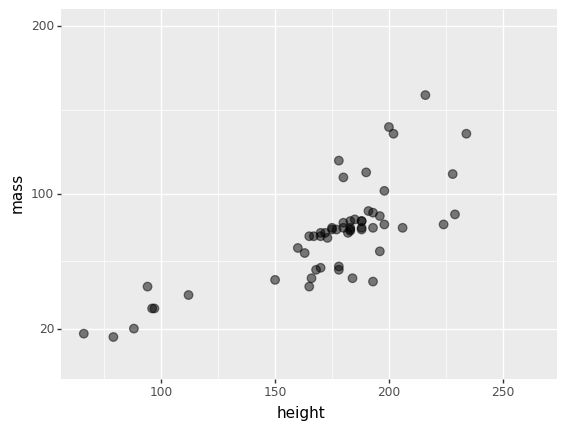

{<ggplot: (318569241)>}

In [24]:
{
    ggplot(star_wars, aes('height', 'mass')) +
    geom_point(size = 3, alpha = .5) +
    scale_y_continuous(limits = [0, 200], breaks = [20, 100, 200])
}

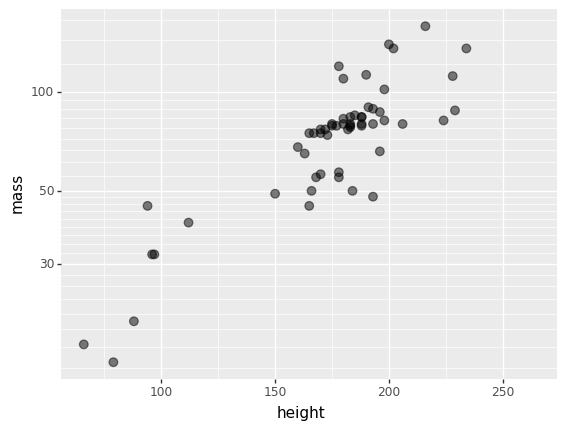

{<ggplot: (317837317)>}

In [25]:
{
    ggplot(star_wars, aes('height', 'mass')) +
    geom_point(size = 3, alpha = .5) +
    scale_y_log10()
}

### Size

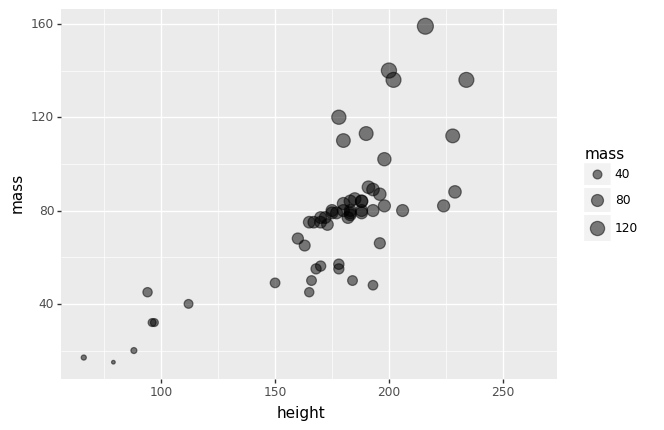

{<ggplot: (318759433)>}

In [27]:
{
    ggplot(star_wars, aes('height', 'mass', size = 'mass')) +
    geom_point(alpha = .5)
}

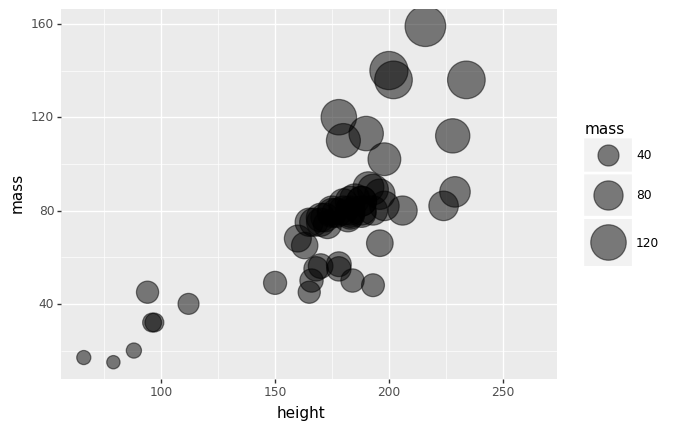

{<ggplot: (318809121)>}

In [29]:
{
    ggplot(star_wars, aes('height', 'mass', size = 'mass')) +
    geom_point(alpha = .5) +
    scale_size_area(max_size = 16)
}

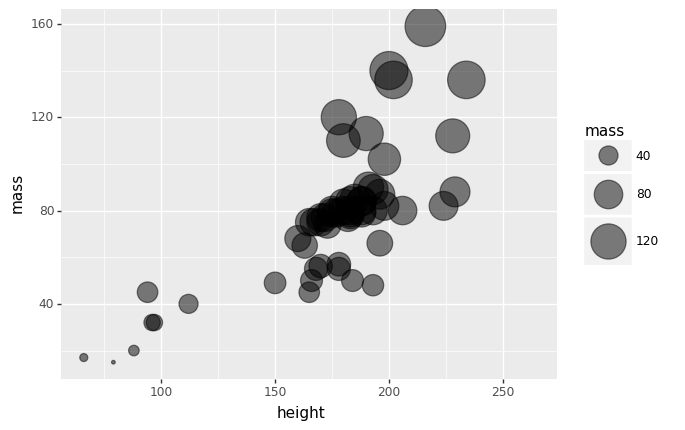

{<ggplot: (318916133)>}

In [31]:
{
    ggplot(star_wars, aes('height', 'mass', size = 'mass')) +
    geom_point(alpha = .5) +
    scale_size_continuous(range = [1,16])
}

### Shape

[Shape possibilities](https://plotnine.readthedocs.io/en/stable/_modules/plotnine/scales/scale_shape.html)

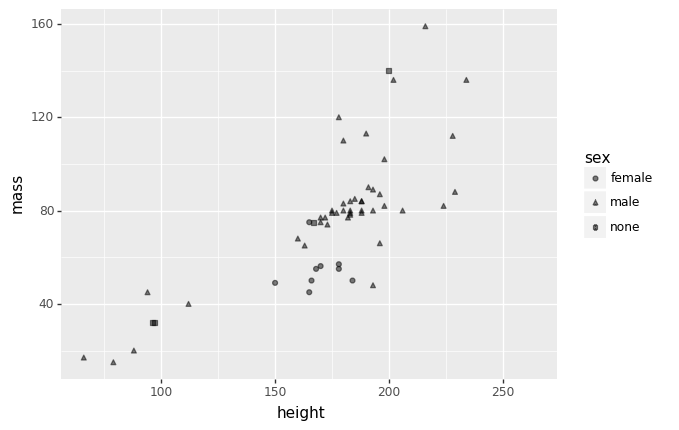

{<ggplot: (318876349)>}

In [37]:
{
    ggplot(star_wars, aes('height', 'mass', shape = 'sex')) +
    geom_point(alpha = .5)
}

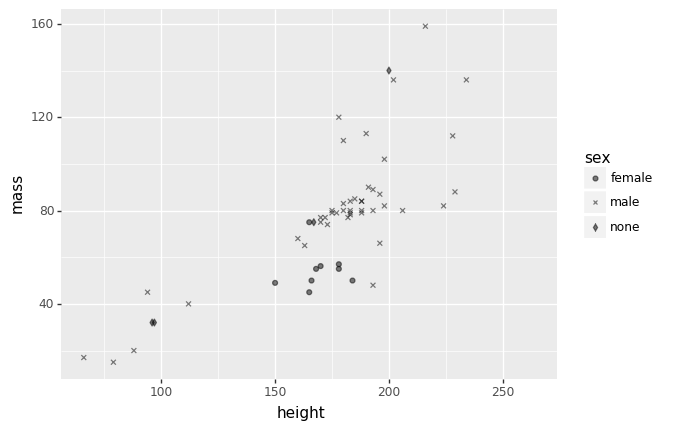

{<ggplot: (318752813)>}

In [43]:
{
    ggplot(star_wars, aes('height', 'mass', shape = 'sex')) +
    geom_point(alpha = .5) +
    scale_shape_manual(values=['o','x','d'])
}

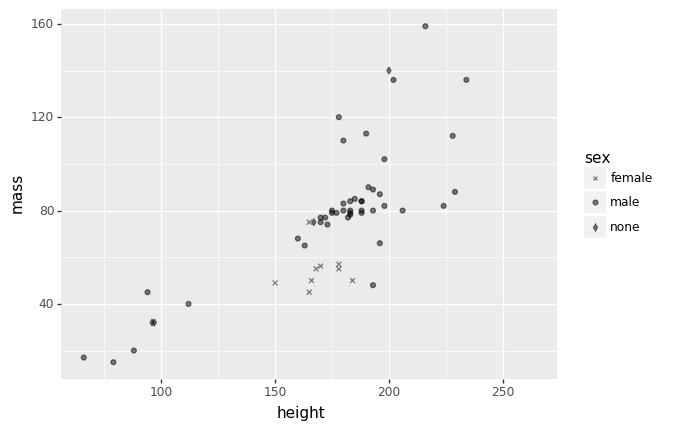

{<ggplot: (319135249)>}

In [45]:
# use a dictionary for name control (like color/fill did)
{
    ggplot(star_wars, aes('height', 'mass', shape = 'sex')) +
    geom_point(alpha = .5) +
    scale_shape_manual(values={'male': 'o', 'female': 'x', 'none': 'd'})
}

### Facets

A killer feature for grouped data displays.

In [53]:
star_wars.groupby('species_groups').name.nunique()

species_groups
Droid     6
Human    35
Other    41
Name: name, dtype: int64

In [52]:
star_wars['species_groups'] = np.select(
    [star_wars.species == 'Human', star_wars.species == "Droid"],
    ['Human', 'Droid'],
    default = 'Other'
)

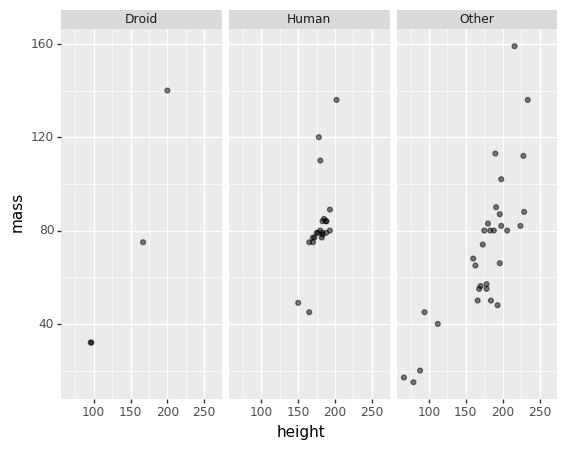

{<ggplot: (318887609)>}

In [57]:
 {
    ggplot(star_wars, aes('height', 'mass')) +
    geom_point(alpha = .5) +
    facet_wrap('~species_groups')
 }

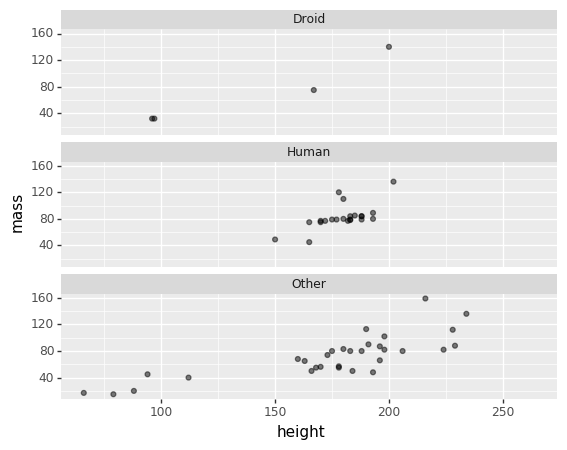

{<ggplot: (320536245)>}

In [58]:
 {
    ggplot(star_wars, aes('height', 'mass')) +
    geom_point(alpha = .5) +
    facet_wrap('~species_groups', ncol = 1)
 }

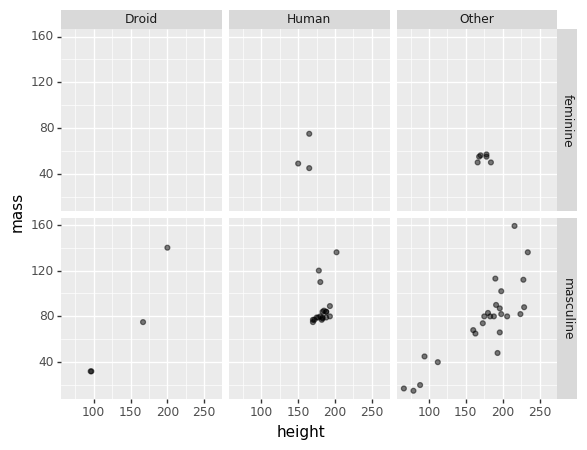

{<ggplot: (321074061)>}

In [60]:
 {
    ggplot(star_wars, aes('height', 'mass')) +
    geom_point(alpha = .5) +
    facet_grid('gender~species_groups')
 }